### 10.	Developing a deep learning model and comparing the results

In [1]:
#Importing the related libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
sb.set()
import joblib

In [2]:
X_train_bv = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train_bv = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [3]:
ct_st = joblib.load('column_transformer_st.joblib')

In [4]:
X_train_bv = ct_st.transform(X_train_bv)
X_test = ct_st.transform(X_test)

In [5]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_bv, y_train_bv, test_size = 0.2, random_state=1)

In [6]:
X_train.shape

(2726, 24)

After loading the arrays, the next step is to select the optimum artificial neural network architecture. This is done by selecting different model parameters combinations and selecting the combination with the minimum absolute percentage error. The first parameter will be hidden layers neurons with 50, 100, 200, 300, 400 and 500 neurons. 

In [7]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
input_layer_size = X_train.shape[1]

def make_regression_model(units=200, activation1='linear', activation2='tanh', activation3='relu', 
                         activation4='relu', activation5='relu', initializer='he_uniform', rate=0):

    model = Sequential()
    model.add(Dense(input_layer_size, input_shape=(input_layer_size,), activation=activation1))
    model.add(Dropout(rate))
    model.add(Dense(units=units, activation=activation2, kernel_initializer=initializer))
    model.add(Dropout(rate))
    model.add(Dense(units=units, activation=activation3, kernel_initializer=initializer))
    model.add(Dropout(rate))
    model.add(Dense(units=units, activation=activation4, kernel_initializer=initializer))
    model.add(Dropout(rate))
    model.add(Dense(1, activation=activation5))
    model.compile(optimizer=optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [8]:
scores = {}
results = {}
batch_size = 100
max_epochs = 500
parameters =['relu', 'linear', 'elu']

for parameter in parameters:
    print(parameter)
    model = make_regression_model(activation1=parameter)
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=max_epochs,
                        validation_data=(X_validate, y_validate), verbose = 2) 
    scores[parameter] = history.history
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    r2_train = round(r2_score(y_train, y_hat_train), 4)
    r2_test = round(r2_score(y_test, y_hat_test), 4)
    mean_abs_error = round(mean_absolute_error(y_test, y_hat_test),0)
    mean_sq_error = round(np.sqrt(mean_squared_error(y_test, y_hat_test)),0)
    mean_abs_percent_error = round(mean_absolute_percentage_error(y_test, y_hat_test), 3)*100
    results[parameter] = [r2_train, r2_test, mean_abs_error, mean_sq_error, mean_abs_percent_error]

relu
Epoch 1/500
28/28 - 2s - loss: 8030474.5000 - mae: 2315.1375 - val_loss: 6005956.5000 - val_mae: 1883.9934 - 2s/epoch - 87ms/step
Epoch 2/500
28/28 - 0s - loss: 3267470.5000 - mae: 1312.4674 - val_loss: 1529254.2500 - val_mae: 934.1864 - 207ms/epoch - 7ms/step
Epoch 3/500
28/28 - 0s - loss: 1132092.8750 - mae: 820.4637 - val_loss: 928277.7500 - val_mae: 723.5051 - 203ms/epoch - 7ms/step
Epoch 4/500
28/28 - 0s - loss: 762799.8750 - mae: 660.7499 - val_loss: 708836.8125 - val_mae: 629.7045 - 216ms/epoch - 8ms/step
Epoch 5/500
28/28 - 0s - loss: 583590.1250 - mae: 576.1277 - val_loss: 564634.2500 - val_mae: 548.4364 - 195ms/epoch - 7ms/step
Epoch 6/500
28/28 - 0s - loss: 483229.1562 - mae: 520.8716 - val_loss: 497410.4375 - val_mae: 523.3569 - 184ms/epoch - 7ms/step
Epoch 7/500
28/28 - 0s - loss: 421881.9375 - mae: 485.6829 - val_loss: 438062.9688 - val_mae: 488.9600 - 200ms/epoch - 7ms/step
Epoch 8/500
28/28 - 0s - loss: 381275.4062 - mae: 459.8571 - val_loss: 406100.7500 - val_mae:

Epoch 65/500
28/28 - 0s - loss: 172448.0000 - mae: 306.5854 - val_loss: 228117.4688 - val_mae: 358.3750 - 198ms/epoch - 7ms/step
Epoch 66/500
28/28 - 0s - loss: 171395.0938 - mae: 305.4312 - val_loss: 217924.9219 - val_mae: 349.8351 - 185ms/epoch - 7ms/step
Epoch 67/500
28/28 - 0s - loss: 173124.9844 - mae: 306.4823 - val_loss: 220008.6094 - val_mae: 347.4395 - 198ms/epoch - 7ms/step
Epoch 68/500
28/28 - 0s - loss: 172183.9062 - mae: 305.7852 - val_loss: 288580.2812 - val_mae: 402.4641 - 299ms/epoch - 11ms/step
Epoch 69/500
28/28 - 0s - loss: 174868.7031 - mae: 305.7487 - val_loss: 220212.2031 - val_mae: 345.0085 - 111ms/epoch - 4ms/step
Epoch 70/500
28/28 - 0s - loss: 166735.2188 - mae: 300.1807 - val_loss: 217403.9375 - val_mae: 347.0367 - 86ms/epoch - 3ms/step
Epoch 71/500
28/28 - 0s - loss: 165989.8750 - mae: 299.9531 - val_loss: 247002.5781 - val_mae: 368.7827 - 99ms/epoch - 4ms/step
Epoch 72/500
28/28 - 0s - loss: 168760.8125 - mae: 303.9475 - val_loss: 229632.4062 - val_mae: 348

Epoch 129/500
28/28 - 0s - loss: 126125.7266 - mae: 258.8051 - val_loss: 179379.9688 - val_mae: 307.4043 - 192ms/epoch - 7ms/step
Epoch 130/500
28/28 - 0s - loss: 133222.7656 - mae: 268.9384 - val_loss: 183079.6406 - val_mae: 312.2274 - 194ms/epoch - 7ms/step
Epoch 131/500
28/28 - 0s - loss: 124964.1406 - mae: 257.9363 - val_loss: 186670.2812 - val_mae: 317.2905 - 199ms/epoch - 7ms/step
Epoch 132/500
28/28 - 0s - loss: 132832.9844 - mae: 269.0821 - val_loss: 179269.0938 - val_mae: 315.7867 - 186ms/epoch - 7ms/step
Epoch 133/500
28/28 - 0s - loss: 130664.9531 - mae: 263.9036 - val_loss: 214635.5938 - val_mae: 336.5190 - 189ms/epoch - 7ms/step
Epoch 134/500
28/28 - 0s - loss: 132665.3125 - mae: 264.7091 - val_loss: 164488.0469 - val_mae: 297.7041 - 183ms/epoch - 7ms/step
Epoch 135/500
28/28 - 0s - loss: 121896.2422 - mae: 255.7400 - val_loss: 170441.1094 - val_mae: 305.1691 - 205ms/epoch - 7ms/step
Epoch 136/500
28/28 - 0s - loss: 128437.7266 - mae: 262.6994 - val_loss: 204417.1250 - val

28/28 - 0s - loss: 104696.1953 - mae: 236.0316 - val_loss: 178462.7344 - val_mae: 315.6042 - 198ms/epoch - 7ms/step
Epoch 193/500
28/28 - 0s - loss: 110745.7109 - mae: 243.8605 - val_loss: 159915.4531 - val_mae: 294.4169 - 183ms/epoch - 7ms/step
Epoch 194/500
28/28 - 0s - loss: 106404.1094 - mae: 238.6301 - val_loss: 184303.6719 - val_mae: 311.3409 - 198ms/epoch - 7ms/step
Epoch 195/500
28/28 - 0s - loss: 105378.0781 - mae: 237.3107 - val_loss: 171153.2969 - val_mae: 311.0180 - 188ms/epoch - 7ms/step
Epoch 196/500
28/28 - 0s - loss: 109129.6875 - mae: 242.1416 - val_loss: 226549.8125 - val_mae: 339.5599 - 180ms/epoch - 6ms/step
Epoch 197/500
28/28 - 0s - loss: 103976.4766 - mae: 236.9514 - val_loss: 189173.5781 - val_mae: 313.6317 - 184ms/epoch - 7ms/step
Epoch 198/500
28/28 - 0s - loss: 105151.3281 - mae: 236.9708 - val_loss: 166370.3750 - val_mae: 293.1651 - 197ms/epoch - 7ms/step
Epoch 199/500
28/28 - 0s - loss: 106438.7109 - mae: 239.8756 - val_loss: 171703.0938 - val_mae: 309.1150

Epoch 256/500
28/28 - 0s - loss: 91682.8672 - mae: 219.3657 - val_loss: 230604.0625 - val_mae: 358.3234 - 197ms/epoch - 7ms/step
Epoch 257/500
28/28 - 0s - loss: 91335.4297 - mae: 219.7905 - val_loss: 146240.5000 - val_mae: 274.6690 - 187ms/epoch - 7ms/step
Epoch 258/500
28/28 - 0s - loss: 91144.2812 - mae: 218.8892 - val_loss: 152819.2188 - val_mae: 289.8476 - 179ms/epoch - 6ms/step
Epoch 259/500
28/28 - 0s - loss: 88179.1484 - mae: 217.2749 - val_loss: 199202.3438 - val_mae: 334.1805 - 184ms/epoch - 7ms/step
Epoch 260/500
28/28 - 0s - loss: 90880.2969 - mae: 220.9332 - val_loss: 177907.3281 - val_mae: 314.7571 - 183ms/epoch - 7ms/step
Epoch 261/500
28/28 - 0s - loss: 94211.6016 - mae: 222.7474 - val_loss: 159928.2656 - val_mae: 293.8686 - 199ms/epoch - 7ms/step
Epoch 262/500
28/28 - 0s - loss: 85980.0469 - mae: 215.2792 - val_loss: 150677.8438 - val_mae: 283.2939 - 185ms/epoch - 7ms/step
Epoch 263/500
28/28 - 0s - loss: 90537.4531 - mae: 219.8273 - val_loss: 145779.0781 - val_mae: 27

Epoch 320/500
28/28 - 0s - loss: 78181.7578 - mae: 202.9205 - val_loss: 183449.2031 - val_mae: 315.2086 - 184ms/epoch - 7ms/step
Epoch 321/500
28/28 - 0s - loss: 79765.1016 - mae: 206.7019 - val_loss: 190756.8125 - val_mae: 321.6346 - 182ms/epoch - 7ms/step
Epoch 322/500
28/28 - 0s - loss: 79175.2578 - mae: 204.3321 - val_loss: 163964.2188 - val_mae: 296.9930 - 183ms/epoch - 7ms/step
Epoch 323/500
28/28 - 0s - loss: 78312.1328 - mae: 204.9855 - val_loss: 183224.2812 - val_mae: 311.3795 - 184ms/epoch - 7ms/step
Epoch 324/500
28/28 - 0s - loss: 80741.2422 - mae: 208.2353 - val_loss: 144725.5625 - val_mae: 274.9546 - 197ms/epoch - 7ms/step
Epoch 325/500
28/28 - 0s - loss: 77072.7656 - mae: 202.3643 - val_loss: 150971.5469 - val_mae: 286.1020 - 189ms/epoch - 7ms/step
Epoch 326/500
28/28 - 0s - loss: 76141.7031 - mae: 201.8988 - val_loss: 154847.4688 - val_mae: 290.1684 - 180ms/epoch - 6ms/step
Epoch 327/500
28/28 - 0s - loss: 77009.7812 - mae: 200.8814 - val_loss: 171087.0938 - val_mae: 29

Epoch 384/500
28/28 - 0s - loss: 67869.1094 - mae: 190.0578 - val_loss: 155509.1094 - val_mae: 283.9444 - 185ms/epoch - 7ms/step
Epoch 385/500
28/28 - 0s - loss: 71127.7266 - mae: 193.9172 - val_loss: 158381.1406 - val_mae: 281.0448 - 183ms/epoch - 7ms/step
Epoch 386/500
28/28 - 0s - loss: 69628.1484 - mae: 191.9130 - val_loss: 151780.8438 - val_mae: 276.4988 - 183ms/epoch - 7ms/step
Epoch 387/500
28/28 - 0s - loss: 67041.5859 - mae: 187.8308 - val_loss: 239499.2656 - val_mae: 367.1568 - 184ms/epoch - 7ms/step
Epoch 388/500
28/28 - 0s - loss: 69428.1641 - mae: 189.6440 - val_loss: 156352.2656 - val_mae: 289.3579 - 188ms/epoch - 7ms/step
Epoch 389/500
28/28 - 0s - loss: 69546.9766 - mae: 193.4759 - val_loss: 162435.8750 - val_mae: 289.3411 - 180ms/epoch - 6ms/step
Epoch 390/500
28/28 - 0s - loss: 70057.9297 - mae: 191.2192 - val_loss: 147569.3438 - val_mae: 273.2115 - 183ms/epoch - 7ms/step
Epoch 391/500
28/28 - 0s - loss: 69854.2266 - mae: 189.9987 - val_loss: 150789.5156 - val_mae: 27

Epoch 448/500
28/28 - 0s - loss: 64211.6523 - mae: 187.3650 - val_loss: 143322.8594 - val_mae: 270.2239 - 199ms/epoch - 7ms/step
Epoch 449/500
28/28 - 0s - loss: 64722.7188 - mae: 185.1226 - val_loss: 156501.4219 - val_mae: 281.2887 - 184ms/epoch - 7ms/step
Epoch 450/500
28/28 - 0s - loss: 60005.8047 - mae: 174.7830 - val_loss: 172837.1875 - val_mae: 297.8488 - 182ms/epoch - 7ms/step
Epoch 451/500
28/28 - 0s - loss: 64166.6953 - mae: 181.4668 - val_loss: 179358.1094 - val_mae: 306.6475 - 201ms/epoch - 7ms/step
Epoch 452/500
28/28 - 0s - loss: 61669.3008 - mae: 177.6918 - val_loss: 161198.4531 - val_mae: 285.2281 - 182ms/epoch - 7ms/step
Epoch 453/500
28/28 - 0s - loss: 62867.1445 - mae: 181.8967 - val_loss: 154655.9688 - val_mae: 278.9786 - 184ms/epoch - 7ms/step
Epoch 454/500
28/28 - 0s - loss: 61923.6641 - mae: 179.0287 - val_loss: 159080.6719 - val_mae: 285.6826 - 184ms/epoch - 7ms/step
Epoch 455/500
28/28 - 0s - loss: 64140.8477 - mae: 183.1054 - val_loss: 170706.8438 - val_mae: 29

Epoch 11/500
28/28 - 0s - loss: 398635.0625 - mae: 479.0685 - val_loss: 504648.4062 - val_mae: 522.9410 - 184ms/epoch - 7ms/step
Epoch 12/500
28/28 - 0s - loss: 372909.8125 - mae: 462.2042 - val_loss: 417116.7188 - val_mae: 465.9128 - 184ms/epoch - 7ms/step
Epoch 13/500
28/28 - 0s - loss: 347224.4688 - mae: 443.8748 - val_loss: 400421.8125 - val_mae: 465.3887 - 198ms/epoch - 7ms/step
Epoch 14/500
28/28 - 0s - loss: 330380.8125 - mae: 433.7352 - val_loss: 380511.2812 - val_mae: 442.8632 - 200ms/epoch - 7ms/step
Epoch 15/500
28/28 - 0s - loss: 311564.0312 - mae: 419.6550 - val_loss: 446560.6562 - val_mae: 471.0480 - 187ms/epoch - 7ms/step
Epoch 16/500
28/28 - 0s - loss: 310755.0625 - mae: 416.8348 - val_loss: 359560.7188 - val_mae: 426.7068 - 179ms/epoch - 6ms/step
Epoch 17/500
28/28 - 0s - loss: 293577.6562 - mae: 406.4418 - val_loss: 396886.0000 - val_mae: 450.0927 - 202ms/epoch - 7ms/step
Epoch 18/500
28/28 - 0s - loss: 291737.1562 - mae: 402.5527 - val_loss: 355126.0000 - val_mae: 42

Epoch 75/500
28/28 - 0s - loss: 142029.5781 - mae: 275.4958 - val_loss: 187040.4688 - val_mae: 322.0526 - 185ms/epoch - 7ms/step
Epoch 76/500
28/28 - 0s - loss: 139769.6094 - mae: 275.4167 - val_loss: 184172.4531 - val_mae: 324.2001 - 184ms/epoch - 7ms/step
Epoch 77/500
28/28 - 0s - loss: 141482.6562 - mae: 275.7370 - val_loss: 173473.6562 - val_mae: 312.9970 - 196ms/epoch - 7ms/step
Epoch 78/500
28/28 - 0s - loss: 139135.8125 - mae: 272.5619 - val_loss: 181615.2344 - val_mae: 320.4389 - 184ms/epoch - 7ms/step
Epoch 79/500
28/28 - 0s - loss: 133595.2656 - mae: 270.3897 - val_loss: 186001.9688 - val_mae: 320.9796 - 185ms/epoch - 7ms/step
Epoch 80/500
28/28 - 0s - loss: 136673.3125 - mae: 269.9885 - val_loss: 203695.4844 - val_mae: 336.6283 - 184ms/epoch - 7ms/step
Epoch 81/500
28/28 - 0s - loss: 137675.3906 - mae: 270.5318 - val_loss: 223350.7969 - val_mae: 348.3340 - 199ms/epoch - 7ms/step
Epoch 82/500
28/28 - 0s - loss: 132400.5469 - mae: 266.7423 - val_loss: 179215.8281 - val_mae: 31

Epoch 139/500
28/28 - 0s - loss: 89643.5469 - mae: 218.2652 - val_loss: 165031.2188 - val_mae: 299.9471 - 199ms/epoch - 7ms/step
Epoch 140/500
28/28 - 0s - loss: 93433.2188 - mae: 220.9168 - val_loss: 153457.4844 - val_mae: 292.3732 - 189ms/epoch - 7ms/step
Epoch 141/500
28/28 - 0s - loss: 91118.1641 - mae: 219.7241 - val_loss: 144409.3906 - val_mae: 279.2221 - 195ms/epoch - 7ms/step
Epoch 142/500
28/28 - 0s - loss: 90565.2188 - mae: 218.3510 - val_loss: 145485.7656 - val_mae: 281.7371 - 199ms/epoch - 7ms/step
Epoch 143/500
28/28 - 0s - loss: 89305.9219 - mae: 215.6228 - val_loss: 168532.8125 - val_mae: 300.5060 - 197ms/epoch - 7ms/step
Epoch 144/500
28/28 - 0s - loss: 85074.7266 - mae: 214.0340 - val_loss: 169707.3281 - val_mae: 304.5765 - 206ms/epoch - 7ms/step
Epoch 145/500
28/28 - 0s - loss: 94173.0547 - mae: 223.2549 - val_loss: 172089.6406 - val_mae: 306.6066 - 196ms/epoch - 7ms/step
Epoch 146/500
28/28 - 0s - loss: 89712.2188 - mae: 217.5807 - val_loss: 167412.7500 - val_mae: 30

Epoch 203/500
28/28 - 0s - loss: 68521.1562 - mae: 187.1158 - val_loss: 134448.3281 - val_mae: 265.6644 - 200ms/epoch - 7ms/step
Epoch 204/500
28/28 - 0s - loss: 67660.7344 - mae: 186.3437 - val_loss: 166930.4688 - val_mae: 299.3960 - 200ms/epoch - 7ms/step
Epoch 205/500
28/28 - 0s - loss: 71248.7891 - mae: 189.3055 - val_loss: 151661.4531 - val_mae: 282.4228 - 198ms/epoch - 7ms/step
Epoch 206/500
28/28 - 0s - loss: 67238.7969 - mae: 185.9965 - val_loss: 145651.5938 - val_mae: 279.2224 - 184ms/epoch - 7ms/step
Epoch 207/500
28/28 - 0s - loss: 65720.4609 - mae: 185.3380 - val_loss: 150992.6250 - val_mae: 285.4875 - 184ms/epoch - 7ms/step
Epoch 208/500
28/28 - 0s - loss: 68327.6562 - mae: 185.1605 - val_loss: 151241.8125 - val_mae: 282.4292 - 198ms/epoch - 7ms/step
Epoch 209/500
28/28 - 0s - loss: 70073.7422 - mae: 190.9348 - val_loss: 138663.5625 - val_mae: 267.9734 - 186ms/epoch - 7ms/step
Epoch 210/500
28/28 - 0s - loss: 66397.8906 - mae: 184.7243 - val_loss: 147126.8750 - val_mae: 27

Epoch 267/500
28/28 - 0s - loss: 55338.0820 - mae: 164.5381 - val_loss: 154359.1719 - val_mae: 281.8561 - 199ms/epoch - 7ms/step
Epoch 268/500
28/28 - 0s - loss: 54521.6367 - mae: 163.0890 - val_loss: 159402.7031 - val_mae: 291.1404 - 199ms/epoch - 7ms/step
Epoch 269/500
28/28 - 0s - loss: 55128.7500 - mae: 165.5645 - val_loss: 142887.9219 - val_mae: 271.6658 - 199ms/epoch - 7ms/step
Epoch 270/500
28/28 - 0s - loss: 54523.3047 - mae: 162.5972 - val_loss: 136329.0156 - val_mae: 265.5692 - 199ms/epoch - 7ms/step
Epoch 271/500
28/28 - 0s - loss: 50211.4570 - mae: 158.7949 - val_loss: 182816.0312 - val_mae: 304.5380 - 198ms/epoch - 7ms/step
Epoch 272/500
28/28 - 0s - loss: 57385.9297 - mae: 168.3970 - val_loss: 129566.1719 - val_mae: 258.4621 - 184ms/epoch - 7ms/step
Epoch 273/500
28/28 - 0s - loss: 54147.7695 - mae: 162.9012 - val_loss: 132541.9219 - val_mae: 258.7541 - 184ms/epoch - 7ms/step
Epoch 274/500
28/28 - 0s - loss: 50880.5352 - mae: 159.5342 - val_loss: 153950.3281 - val_mae: 28

Epoch 331/500
28/28 - 0s - loss: 45003.5625 - mae: 146.7762 - val_loss: 144074.9375 - val_mae: 271.2491 - 80ms/epoch - 3ms/step
Epoch 332/500
28/28 - 0s - loss: 49219.4805 - mae: 155.1814 - val_loss: 160806.6406 - val_mae: 287.6260 - 79ms/epoch - 3ms/step
Epoch 333/500
28/28 - 0s - loss: 44007.4766 - mae: 146.5055 - val_loss: 172227.7812 - val_mae: 302.1804 - 94ms/epoch - 3ms/step
Epoch 334/500
28/28 - 0s - loss: 46142.6445 - mae: 149.2373 - val_loss: 136239.2812 - val_mae: 263.2095 - 94ms/epoch - 3ms/step
Epoch 335/500
28/28 - 0s - loss: 43386.7031 - mae: 145.0892 - val_loss: 146501.9531 - val_mae: 273.2822 - 78ms/epoch - 3ms/step
Epoch 336/500
28/28 - 0s - loss: 44434.7305 - mae: 146.0787 - val_loss: 205494.7969 - val_mae: 332.6551 - 94ms/epoch - 3ms/step
Epoch 337/500
28/28 - 0s - loss: 44405.5508 - mae: 145.2033 - val_loss: 140958.6250 - val_mae: 267.2687 - 94ms/epoch - 3ms/step
Epoch 338/500
28/28 - 0s - loss: 46130.9336 - mae: 149.1494 - val_loss: 164569.5312 - val_mae: 295.6127 

Epoch 395/500
28/28 - 0s - loss: 36312.8086 - mae: 130.4036 - val_loss: 147958.6094 - val_mae: 276.4904 - 110ms/epoch - 4ms/step
Epoch 396/500
28/28 - 0s - loss: 41090.6367 - mae: 137.6583 - val_loss: 167111.3125 - val_mae: 294.9113 - 110ms/epoch - 4ms/step
Epoch 397/500
28/28 - 0s - loss: 38655.7031 - mae: 132.2828 - val_loss: 148588.1875 - val_mae: 275.6816 - 110ms/epoch - 4ms/step
Epoch 398/500
28/28 - 0s - loss: 39565.0312 - mae: 135.8624 - val_loss: 142809.5469 - val_mae: 269.8209 - 94ms/epoch - 3ms/step
Epoch 399/500
28/28 - 0s - loss: 40839.5039 - mae: 139.0809 - val_loss: 140030.7344 - val_mae: 266.6633 - 100ms/epoch - 4ms/step
Epoch 400/500
28/28 - 0s - loss: 40042.5547 - mae: 135.5692 - val_loss: 158752.0312 - val_mae: 284.8187 - 105ms/epoch - 4ms/step
Epoch 401/500
28/28 - 0s - loss: 36076.5117 - mae: 130.6628 - val_loss: 142544.0312 - val_mae: 269.2958 - 110ms/epoch - 4ms/step
Epoch 402/500
28/28 - 0s - loss: 40157.4922 - mae: 136.5327 - val_loss: 139276.4219 - val_mae: 267

Epoch 459/500
28/28 - 0s - loss: 36034.7188 - mae: 128.3618 - val_loss: 160079.6094 - val_mae: 283.0866 - 110ms/epoch - 4ms/step
Epoch 460/500
28/28 - 0s - loss: 35643.8516 - mae: 125.7593 - val_loss: 143138.1875 - val_mae: 266.1627 - 109ms/epoch - 4ms/step
Epoch 461/500
28/28 - 0s - loss: 34690.2969 - mae: 124.9204 - val_loss: 159769.8594 - val_mae: 288.5099 - 94ms/epoch - 3ms/step
Epoch 462/500
28/28 - 0s - loss: 35452.8477 - mae: 126.5734 - val_loss: 151274.6406 - val_mae: 274.6308 - 109ms/epoch - 4ms/step
Epoch 463/500
28/28 - 0s - loss: 32463.9238 - mae: 120.7497 - val_loss: 157850.1875 - val_mae: 281.5976 - 109ms/epoch - 4ms/step
Epoch 464/500
28/28 - 0s - loss: 35101.2578 - mae: 128.2106 - val_loss: 170833.8594 - val_mae: 291.4789 - 110ms/epoch - 4ms/step
Epoch 465/500
28/28 - 0s - loss: 33930.9180 - mae: 121.9448 - val_loss: 164490.9375 - val_mae: 289.2441 - 94ms/epoch - 3ms/step
Epoch 466/500
28/28 - 0s - loss: 34971.8281 - mae: 125.5092 - val_loss: 149009.5156 - val_mae: 276.

Epoch 22/500
28/28 - 0s - loss: 253959.4219 - mae: 370.0524 - val_loss: 323963.3438 - val_mae: 406.2652 - 110ms/epoch - 4ms/step
Epoch 23/500
28/28 - 0s - loss: 249885.0469 - mae: 364.4955 - val_loss: 335049.1250 - val_mae: 410.9361 - 94ms/epoch - 3ms/step
Epoch 24/500
28/28 - 0s - loss: 245335.5312 - mae: 362.1387 - val_loss: 305314.0312 - val_mae: 402.6144 - 94ms/epoch - 3ms/step
Epoch 25/500
28/28 - 0s - loss: 243532.4375 - mae: 361.3876 - val_loss: 314279.9062 - val_mae: 399.7676 - 109ms/epoch - 4ms/step
Epoch 26/500
28/28 - 0s - loss: 236529.1094 - mae: 354.5694 - val_loss: 290001.2812 - val_mae: 385.1794 - 94ms/epoch - 3ms/step
Epoch 27/500
28/28 - 0s - loss: 237353.3281 - mae: 354.0722 - val_loss: 282990.4375 - val_mae: 381.3065 - 109ms/epoch - 4ms/step
Epoch 28/500
28/28 - 0s - loss: 233138.9062 - mae: 352.3265 - val_loss: 319839.0312 - val_mae: 412.2392 - 110ms/epoch - 4ms/step
Epoch 29/500
28/28 - 0s - loss: 225705.9844 - mae: 346.9404 - val_loss: 272883.6250 - val_mae: 381.5

Epoch 86/500
28/28 - 0s - loss: 136144.2188 - mae: 266.2935 - val_loss: 175486.2812 - val_mae: 309.1805 - 193ms/epoch - 7ms/step
Epoch 87/500
28/28 - 0s - loss: 135030.2031 - mae: 265.2750 - val_loss: 238525.9531 - val_mae: 354.1948 - 211ms/epoch - 8ms/step
Epoch 88/500
28/28 - 0s - loss: 134203.0000 - mae: 265.2516 - val_loss: 171772.0625 - val_mae: 308.7791 - 205ms/epoch - 7ms/step
Epoch 89/500
28/28 - 0s - loss: 133170.6250 - mae: 261.9839 - val_loss: 187870.9688 - val_mae: 316.5991 - 220ms/epoch - 8ms/step
Epoch 90/500
28/28 - 0s - loss: 127674.2969 - mae: 259.1595 - val_loss: 226963.1406 - val_mae: 359.8669 - 216ms/epoch - 8ms/step
Epoch 91/500
28/28 - 0s - loss: 134052.8438 - mae: 264.6197 - val_loss: 176402.8438 - val_mae: 313.4551 - 207ms/epoch - 7ms/step
Epoch 92/500
28/28 - 0s - loss: 130453.0234 - mae: 262.5498 - val_loss: 191581.2344 - val_mae: 318.8439 - 214ms/epoch - 8ms/step
Epoch 93/500
28/28 - 0s - loss: 127768.6406 - mae: 259.6578 - val_loss: 178573.6875 - val_mae: 31

Epoch 150/500
28/28 - 0s - loss: 95918.0781 - mae: 221.3295 - val_loss: 174057.5000 - val_mae: 302.5646 - 196ms/epoch - 7ms/step
Epoch 151/500
28/28 - 0s - loss: 91841.6172 - mae: 217.7416 - val_loss: 168336.5469 - val_mae: 304.7245 - 197ms/epoch - 7ms/step
Epoch 152/500
28/28 - 0s - loss: 93392.3125 - mae: 217.9921 - val_loss: 150852.8594 - val_mae: 282.3716 - 195ms/epoch - 7ms/step
Epoch 153/500
28/28 - 0s - loss: 91210.5156 - mae: 215.3947 - val_loss: 258484.3906 - val_mae: 375.9787 - 210ms/epoch - 7ms/step
Epoch 154/500
28/28 - 0s - loss: 93975.7266 - mae: 218.6727 - val_loss: 144976.9844 - val_mae: 277.0646 - 192ms/epoch - 7ms/step
Epoch 155/500
28/28 - 0s - loss: 91378.8203 - mae: 216.5819 - val_loss: 160065.1094 - val_mae: 288.4826 - 189ms/epoch - 7ms/step
Epoch 156/500
28/28 - 0s - loss: 94337.5859 - mae: 221.4187 - val_loss: 149400.0312 - val_mae: 279.5736 - 201ms/epoch - 7ms/step
Epoch 157/500
28/28 - 0s - loss: 88746.5938 - mae: 213.2244 - val_loss: 156440.6875 - val_mae: 28

Epoch 214/500
28/28 - 0s - loss: 73057.2422 - mae: 190.7208 - val_loss: 161018.3125 - val_mae: 289.2917 - 181ms/epoch - 6ms/step
Epoch 215/500
28/28 - 0s - loss: 71291.0469 - mae: 190.3800 - val_loss: 139475.3906 - val_mae: 268.4808 - 183ms/epoch - 7ms/step
Epoch 216/500
28/28 - 0s - loss: 70994.6562 - mae: 187.3573 - val_loss: 199513.8125 - val_mae: 323.5161 - 207ms/epoch - 7ms/step
Epoch 217/500
28/28 - 0s - loss: 70956.9609 - mae: 189.9743 - val_loss: 147301.8125 - val_mae: 278.4689 - 194ms/epoch - 7ms/step
Epoch 218/500
28/28 - 0s - loss: 71181.4453 - mae: 190.7105 - val_loss: 142909.0469 - val_mae: 276.8709 - 200ms/epoch - 7ms/step
Epoch 219/500
28/28 - 0s - loss: 66694.8984 - mae: 184.4437 - val_loss: 151252.3750 - val_mae: 280.6558 - 200ms/epoch - 7ms/step
Epoch 220/500
28/28 - 0s - loss: 70338.6875 - mae: 186.9500 - val_loss: 177885.4219 - val_mae: 315.8978 - 182ms/epoch - 7ms/step
Epoch 221/500
28/28 - 0s - loss: 70110.4766 - mae: 190.1190 - val_loss: 140644.4219 - val_mae: 27

Epoch 278/500
28/28 - 0s - loss: 55109.3984 - mae: 164.7168 - val_loss: 172848.9375 - val_mae: 301.7077 - 199ms/epoch - 7ms/step
Epoch 279/500
28/28 - 0s - loss: 59176.7109 - mae: 171.9831 - val_loss: 152436.8125 - val_mae: 279.6643 - 200ms/epoch - 7ms/step
Epoch 280/500
28/28 - 0s - loss: 56936.3945 - mae: 169.6878 - val_loss: 150087.0781 - val_mae: 279.4113 - 196ms/epoch - 7ms/step
Epoch 281/500
28/28 - 0s - loss: 57862.6562 - mae: 168.5352 - val_loss: 141159.7188 - val_mae: 272.6174 - 187ms/epoch - 7ms/step
Epoch 282/500
28/28 - 0s - loss: 55589.6992 - mae: 165.8854 - val_loss: 187022.2500 - val_mae: 316.5518 - 183ms/epoch - 7ms/step
Epoch 283/500
28/28 - 0s - loss: 57089.1875 - mae: 170.1769 - val_loss: 173853.2031 - val_mae: 304.6242 - 183ms/epoch - 7ms/step
Epoch 284/500
28/28 - 0s - loss: 58294.0000 - mae: 170.7521 - val_loss: 158609.7344 - val_mae: 287.6268 - 185ms/epoch - 7ms/step
Epoch 285/500
28/28 - 0s - loss: 53520.9805 - mae: 163.4274 - val_loss: 156878.4219 - val_mae: 28

Epoch 342/500
28/28 - 0s - loss: 48261.5781 - mae: 153.6479 - val_loss: 140753.6250 - val_mae: 270.1724 - 183ms/epoch - 7ms/step
Epoch 343/500
28/28 - 0s - loss: 49014.2578 - mae: 155.0608 - val_loss: 142996.0156 - val_mae: 270.9409 - 185ms/epoch - 7ms/step
Epoch 344/500
28/28 - 0s - loss: 47384.1445 - mae: 151.9181 - val_loss: 197244.6406 - val_mae: 326.7328 - 184ms/epoch - 7ms/step
Epoch 345/500
28/28 - 0s - loss: 46839.3047 - mae: 151.7188 - val_loss: 143616.6406 - val_mae: 268.2579 - 204ms/epoch - 7ms/step
Epoch 346/500
28/28 - 0s - loss: 48151.5234 - mae: 152.6737 - val_loss: 141611.3750 - val_mae: 267.9708 - 197ms/epoch - 7ms/step
Epoch 347/500
28/28 - 0s - loss: 47039.9453 - mae: 150.9827 - val_loss: 140724.1719 - val_mae: 266.8308 - 187ms/epoch - 7ms/step
Epoch 348/500
28/28 - 0s - loss: 48069.8281 - mae: 152.9407 - val_loss: 153751.6562 - val_mae: 280.8202 - 190ms/epoch - 7ms/step
Epoch 349/500
28/28 - 0s - loss: 46206.7500 - mae: 149.2415 - val_loss: 164197.1562 - val_mae: 28

Epoch 406/500
28/28 - 0s - loss: 39557.5312 - mae: 138.4059 - val_loss: 145535.6250 - val_mae: 270.1246 - 200ms/epoch - 7ms/step
Epoch 407/500
28/28 - 0s - loss: 41934.9336 - mae: 142.7408 - val_loss: 146980.3125 - val_mae: 267.5591 - 202ms/epoch - 7ms/step
Epoch 408/500
28/28 - 0s - loss: 42695.8203 - mae: 143.9833 - val_loss: 149606.7812 - val_mae: 269.4140 - 199ms/epoch - 7ms/step
Epoch 409/500
28/28 - 0s - loss: 40633.2344 - mae: 140.9920 - val_loss: 191521.2969 - val_mae: 320.2787 - 207ms/epoch - 7ms/step
Epoch 410/500
28/28 - 0s - loss: 42957.5859 - mae: 145.3302 - val_loss: 171058.3125 - val_mae: 293.3273 - 195ms/epoch - 7ms/step
Epoch 411/500
28/28 - 0s - loss: 41564.8555 - mae: 139.9700 - val_loss: 144214.5625 - val_mae: 263.9665 - 205ms/epoch - 7ms/step
Epoch 412/500
28/28 - 0s - loss: 41511.9922 - mae: 142.2663 - val_loss: 148790.4688 - val_mae: 269.0779 - 197ms/epoch - 7ms/step
Epoch 413/500
28/28 - 0s - loss: 40931.0000 - mae: 139.2581 - val_loss: 159406.3125 - val_mae: 28

Epoch 470/500
28/28 - 0s - loss: 36669.7852 - mae: 132.2509 - val_loss: 161975.2500 - val_mae: 276.5837 - 191ms/epoch - 7ms/step
Epoch 471/500
28/28 - 0s - loss: 35719.1680 - mae: 128.9374 - val_loss: 161711.5469 - val_mae: 279.7781 - 211ms/epoch - 8ms/step
Epoch 472/500
28/28 - 0s - loss: 38063.4219 - mae: 134.4754 - val_loss: 181636.1094 - val_mae: 303.6802 - 196ms/epoch - 7ms/step
Epoch 473/500
28/28 - 0s - loss: 35067.3555 - mae: 127.6762 - val_loss: 161586.8438 - val_mae: 281.9024 - 214ms/epoch - 8ms/step
Epoch 474/500
28/28 - 0s - loss: 37294.7031 - mae: 131.1688 - val_loss: 159405.3281 - val_mae: 275.2279 - 215ms/epoch - 8ms/step
Epoch 475/500
28/28 - 0s - loss: 36714.2227 - mae: 131.2977 - val_loss: 158905.7188 - val_mae: 279.1714 - 192ms/epoch - 7ms/step
Epoch 476/500
28/28 - 0s - loss: 35736.1328 - mae: 129.3885 - val_loss: 157073.0000 - val_mae: 276.6032 - 203ms/epoch - 7ms/step
Epoch 477/500
28/28 - 0s - loss: 36248.1094 - mae: 129.4948 - val_loss: 150156.5625 - val_mae: 26

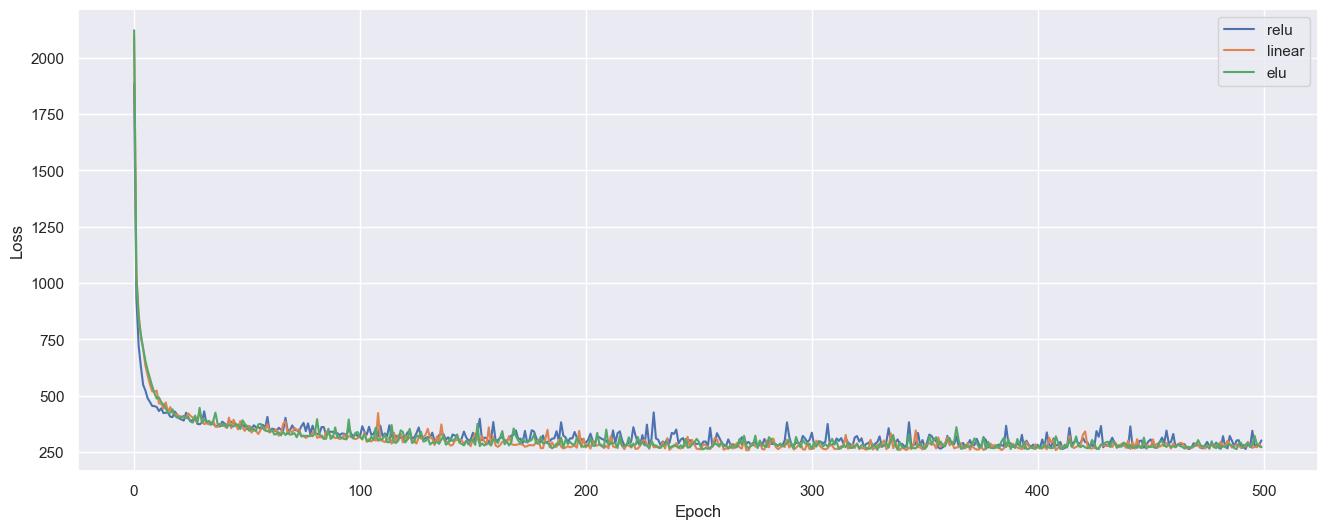

In [9]:
#Plotting the results
plt.figure(figsize = [16, 6])
for parameter, hist in scores.items():
    plt.plot(hist['val_mae'], label=parameters)

plt.legend(parameters)
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [10]:
#Results table
pd.DataFrame(results, index=['r2_train', 'r2_test', 'mean_abs_error', 'mean_sq_error', 'mean_abs_percent_error'])

,relu,linear,elu
r2_train,0.9692,0.9901,0.9893
r2_test,0.9417,0.9520,0.9542
mean_abs_error,300.0000,263.0000,255.0000
mean_sq_error,432.0000,392.0000,383.0000
mean_abs_percent_error,15.6000,14.5000,15.3000


From the above results, selected hidden layers neurons will be 400. 

Using the same method, the following parameter combinations were run:

- Activation function 1: [Relu, Linear]
- Activation function 2: [Swish, Tanh, Sigmoid, Hard Sigmoid]
- Activation function 3: [Relu, Elu, Linear]
- Activation function 4: [Relu, Elu, Linear]
- Activation function 5: [Relu, Elu, Linear]
- Kernel initializer: [glorot normal, glorot uniform, he normal, he uniform]
- Batch size: [50, 100, 150, 200, 250]
- Maximum epochs: [500, 800, 1000, 1500, 2000]
- Learning rate: [0.01, 0.001, 0.0001]
- Optimizer: [Adam, RMSprop]
- Dropout rate: [0, 0.01, 0.05, 0.1, 0.2]

After running all the above combinations, the final parameters will be as following:

- hidden layers neurons: 400
- Activation function 1: Linear
- Activation function 2: Tanh
- Activation function 3: Elu
- Activation function 4: Relu
- Activation function 5: Elu
- Kernel initializer: glorot uniform
- Batch size: 150
- Maximum epochs: 1000
- Learning rate: 0.001
- Optimizer: Adam
- Dropout rate: 0.05

In [11]:
#Running the model with the optimum selected parameters
input_layer_size = X_train.shape[1]
hidden_layer_size = 500
batch_size = 250
max_epochs = 400

model = Sequential()
model.add(Dense(input_layer_size, input_shape=(input_layer_size,)
                , kernel_initializer='he_normal', activation='linear'))
model.add(Dense(hidden_layer_size, activation='swish', kernel_initializer='he_normal'))
model.add(Dense(hidden_layer_size, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(hidden_layer_size, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=max_epochs
                    , validation_data=(X_validate, y_validate), verbose = 2) 

Epoch 1/400
11/11 - 2s - loss: 8479604.0000 - mae: 2398.5659 - val_loss: 8139548.0000 - val_mae: 2304.6785 - 2s/epoch - 226ms/step
Epoch 2/400
11/11 - 0s - loss: 7465607.0000 - mae: 2178.6726 - val_loss: 7209373.0000 - val_mae: 2099.1907 - 191ms/epoch - 17ms/step
Epoch 3/400
11/11 - 0s - loss: 6572437.5000 - mae: 1981.7616 - val_loss: 6320448.0000 - val_mae: 1905.1177 - 199ms/epoch - 18ms/step
Epoch 4/400
11/11 - 0s - loss: 5717025.5000 - mae: 1796.3870 - val_loss: 5473268.0000 - val_mae: 1726.9935 - 183ms/epoch - 17ms/step
Epoch 5/400
11/11 - 0s - loss: 4912086.0000 - mae: 1633.7003 - val_loss: 4676782.0000 - val_mae: 1556.4791 - 168ms/epoch - 15ms/step
Epoch 6/400
11/11 - 0s - loss: 4132305.5000 - mae: 1448.3744 - val_loss: 3893164.0000 - val_mae: 1357.1411 - 181ms/epoch - 16ms/step
Epoch 7/400
11/11 - 0s - loss: 3388945.0000 - mae: 1261.4618 - val_loss: 3183976.0000 - val_mae: 1199.9928 - 190ms/epoch - 17ms/step
Epoch 8/400
11/11 - 0s - loss: 2732871.0000 - mae: 1105.7454 - val_loss

Epoch 64/400
11/11 - 0s - loss: 76010.7266 - mae: 190.9493 - val_loss: 167138.4844 - val_mae: 293.3004 - 183ms/epoch - 17ms/step
Epoch 65/400
11/11 - 0s - loss: 90997.6719 - mae: 216.3717 - val_loss: 158888.8281 - val_mae: 292.2389 - 182ms/epoch - 17ms/step
Epoch 66/400
11/11 - 0s - loss: 82866.1953 - mae: 201.8207 - val_loss: 148038.0781 - val_mae: 279.0073 - 196ms/epoch - 18ms/step
Epoch 67/400
11/11 - 0s - loss: 88147.9844 - mae: 208.0545 - val_loss: 141327.8906 - val_mae: 272.6910 - 184ms/epoch - 17ms/step
Epoch 68/400
11/11 - 0s - loss: 92079.1328 - mae: 214.6836 - val_loss: 142161.6719 - val_mae: 274.7211 - 189ms/epoch - 17ms/step
Epoch 69/400
11/11 - 0s - loss: 71122.0391 - mae: 185.2699 - val_loss: 146350.0469 - val_mae: 278.2758 - 193ms/epoch - 18ms/step
Epoch 70/400
11/11 - 0s - loss: 82920.6406 - mae: 206.7318 - val_loss: 147981.9375 - val_mae: 276.2891 - 199ms/epoch - 18ms/step
Epoch 71/400
11/11 - 0s - loss: 78217.7344 - mae: 196.6577 - val_loss: 144972.9688 - val_mae: 277

Epoch 128/400
11/11 - 0s - loss: 43453.8008 - mae: 146.2243 - val_loss: 124443.5547 - val_mae: 250.4095 - 184ms/epoch - 17ms/step
Epoch 129/400
11/11 - 0s - loss: 42157.2812 - mae: 146.6740 - val_loss: 131184.5938 - val_mae: 258.7952 - 176ms/epoch - 16ms/step
Epoch 130/400
11/11 - 0s - loss: 42387.2383 - mae: 146.2090 - val_loss: 143169.2188 - val_mae: 271.6510 - 174ms/epoch - 16ms/step
Epoch 131/400
11/11 - 0s - loss: 39931.2773 - mae: 137.6188 - val_loss: 125307.8125 - val_mae: 253.3181 - 203ms/epoch - 18ms/step
Epoch 132/400
11/11 - 0s - loss: 43445.0469 - mae: 147.8651 - val_loss: 132699.8906 - val_mae: 263.6792 - 185ms/epoch - 17ms/step
Epoch 133/400
11/11 - 0s - loss: 37509.6719 - mae: 136.4832 - val_loss: 129265.0312 - val_mae: 254.8497 - 197ms/epoch - 18ms/step
Epoch 134/400
11/11 - 0s - loss: 38993.6797 - mae: 140.7561 - val_loss: 128027.1797 - val_mae: 254.4046 - 185ms/epoch - 17ms/step
Epoch 135/400
11/11 - 0s - loss: 40496.9727 - mae: 142.5269 - val_loss: 125893.8281 - val_

11/11 - 0s - loss: 31066.8516 - mae: 124.5949 - val_loss: 122315.7500 - val_mae: 244.3210 - 188ms/epoch - 17ms/step
Epoch 192/400
11/11 - 0s - loss: 28007.0762 - mae: 118.2088 - val_loss: 136454.3750 - val_mae: 260.9856 - 183ms/epoch - 17ms/step
Epoch 193/400
11/11 - 0s - loss: 22105.7324 - mae: 99.4327 - val_loss: 127538.1562 - val_mae: 252.0573 - 177ms/epoch - 16ms/step
Epoch 194/400
11/11 - 0s - loss: 32568.6641 - mae: 132.6337 - val_loss: 132279.3125 - val_mae: 257.6517 - 186ms/epoch - 17ms/step
Epoch 195/400
11/11 - 0s - loss: 21903.4141 - mae: 101.3035 - val_loss: 130477.1172 - val_mae: 256.0138 - 172ms/epoch - 16ms/step
Epoch 196/400
11/11 - 0s - loss: 27424.0059 - mae: 113.7646 - val_loss: 139604.0938 - val_mae: 270.9602 - 192ms/epoch - 17ms/step
Epoch 197/400
11/11 - 0s - loss: 26311.0371 - mae: 111.0565 - val_loss: 146883.7344 - val_mae: 276.7758 - 179ms/epoch - 16ms/step
Epoch 198/400
11/11 - 0s - loss: 23487.8516 - mae: 104.6185 - val_loss: 126558.0625 - val_mae: 247.4246 -

Epoch 255/400
11/11 - 0s - loss: 19275.6758 - mae: 93.7081 - val_loss: 133121.8594 - val_mae: 252.0396 - 184ms/epoch - 17ms/step
Epoch 256/400
11/11 - 0s - loss: 20196.8652 - mae: 101.2002 - val_loss: 124267.7422 - val_mae: 243.0181 - 185ms/epoch - 17ms/step
Epoch 257/400
11/11 - 0s - loss: 20500.4375 - mae: 97.3127 - val_loss: 147263.8594 - val_mae: 272.4673 - 187ms/epoch - 17ms/step
Epoch 258/400
11/11 - 0s - loss: 20764.9980 - mae: 96.8515 - val_loss: 142614.3750 - val_mae: 266.0648 - 183ms/epoch - 17ms/step
Epoch 259/400
11/11 - 0s - loss: 16305.1436 - mae: 83.6646 - val_loss: 127796.8359 - val_mae: 248.8146 - 179ms/epoch - 16ms/step
Epoch 260/400
11/11 - 0s - loss: 22350.9004 - mae: 105.3350 - val_loss: 126228.9609 - val_mae: 246.5153 - 185ms/epoch - 17ms/step
Epoch 261/400
11/11 - 0s - loss: 19726.1680 - mae: 96.2947 - val_loss: 129958.9453 - val_mae: 253.9356 - 184ms/epoch - 17ms/step
Epoch 262/400
11/11 - 0s - loss: 18342.9824 - mae: 95.1637 - val_loss: 124790.6172 - val_mae: 2

Epoch 319/400
11/11 - 0s - loss: 13595.1152 - mae: 81.0147 - val_loss: 129596.3438 - val_mae: 250.0910 - 185ms/epoch - 17ms/step
Epoch 320/400
11/11 - 0s - loss: 15589.9805 - mae: 88.6155 - val_loss: 129733.5703 - val_mae: 250.0039 - 168ms/epoch - 15ms/step
Epoch 321/400
11/11 - 0s - loss: 13115.6328 - mae: 78.0455 - val_loss: 124734.9766 - val_mae: 242.3922 - 183ms/epoch - 17ms/step
Epoch 322/400
11/11 - 0s - loss: 18055.0430 - mae: 95.1110 - val_loss: 128798.0547 - val_mae: 245.0688 - 185ms/epoch - 17ms/step
Epoch 323/400
11/11 - 0s - loss: 13231.2871 - mae: 71.6751 - val_loss: 128296.1641 - val_mae: 249.8558 - 172ms/epoch - 16ms/step
Epoch 324/400
11/11 - 0s - loss: 14931.8887 - mae: 85.6938 - val_loss: 124034.1562 - val_mae: 241.6272 - 183ms/epoch - 17ms/step
Epoch 325/400
11/11 - 0s - loss: 16582.8770 - mae: 93.1917 - val_loss: 125610.4531 - val_mae: 246.9080 - 183ms/epoch - 17ms/step
Epoch 326/400
11/11 - 0s - loss: 12390.7100 - mae: 69.9858 - val_loss: 133479.5312 - val_mae: 255

Epoch 383/400
11/11 - 0s - loss: 13335.7158 - mae: 81.6960 - val_loss: 127408.5312 - val_mae: 245.2783 - 192ms/epoch - 17ms/step
Epoch 384/400
11/11 - 0s - loss: 12912.4756 - mae: 79.2100 - val_loss: 128901.5391 - val_mae: 246.7422 - 192ms/epoch - 17ms/step
Epoch 385/400
11/11 - 0s - loss: 10167.7979 - mae: 66.8289 - val_loss: 136110.8438 - val_mae: 255.4863 - 194ms/epoch - 18ms/step
Epoch 386/400
11/11 - 0s - loss: 14982.7686 - mae: 85.1131 - val_loss: 123517.3984 - val_mae: 240.9854 - 181ms/epoch - 16ms/step
Epoch 387/400
11/11 - 0s - loss: 13155.2314 - mae: 80.0968 - val_loss: 128726.6875 - val_mae: 249.2296 - 193ms/epoch - 18ms/step
Epoch 388/400
11/11 - 0s - loss: 10169.0771 - mae: 65.5820 - val_loss: 128962.5547 - val_mae: 248.5888 - 183ms/epoch - 17ms/step
Epoch 389/400
11/11 - 0s - loss: 16131.1016 - mae: 90.0512 - val_loss: 126111.9531 - val_mae: 243.3277 - 189ms/epoch - 17ms/step
Epoch 390/400
11/11 - 0s - loss: 9549.9092 - mae: 61.7152 - val_loss: 127336.0234 - val_mae: 244.

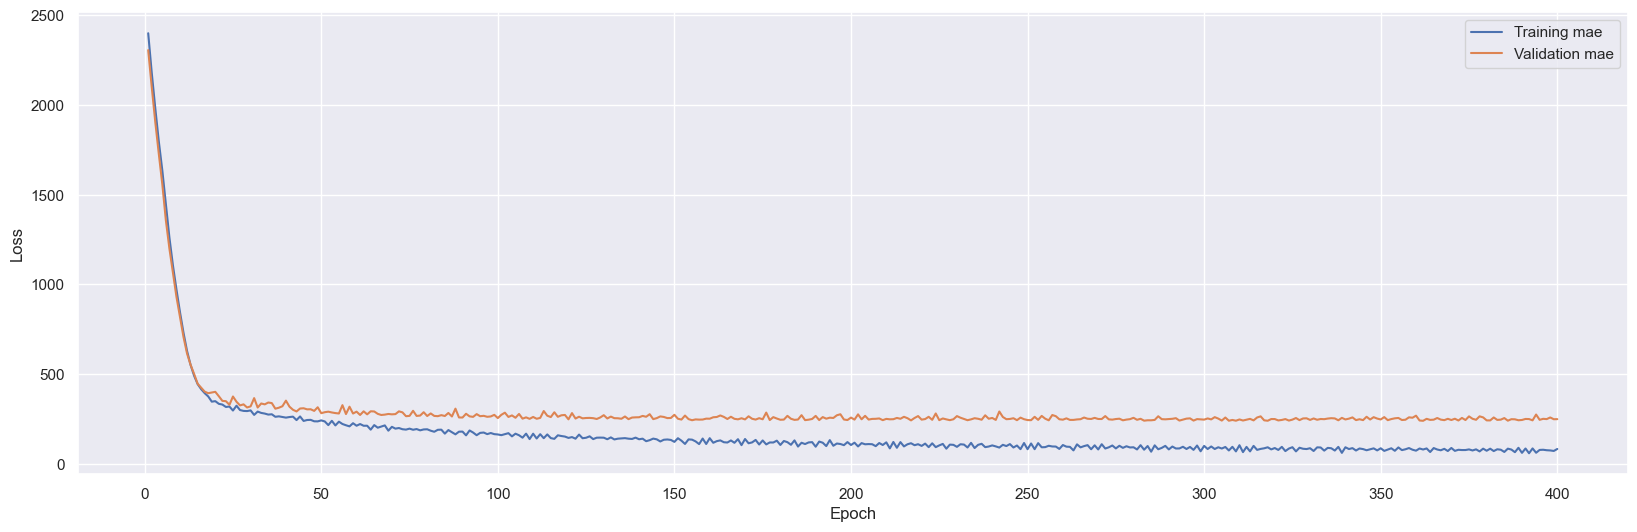

In [12]:
#Plotting epochs validation loss
plt.figure(figsize = [20, 6])
training_loss = np.sqrt(history.history['loss'])
validation_loss = np.sqrt(history.history['val_loss'])
training_mae = history.history['mae']
validation_mae = history.history['val_mae']

epoch_count = range(1, len(training_loss)+1)

plt.plot(epoch_count, training_mae)
plt.plot(epoch_count, validation_mae)

plt.legend(['Training mae', 'Validation mae'])
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [13]:
#Using the model for prediction
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

27/27 [==============================] - 0s 4ms/step


0.996

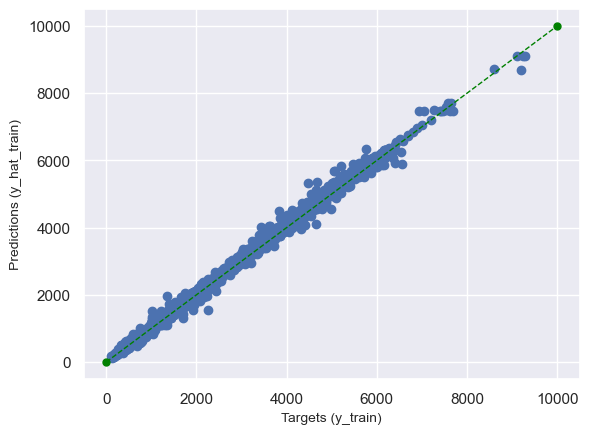

In [14]:
#Plotting train data results

plt.scatter(y_train, y_hat_train)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat_train)',size=10)
plt.plot([0,10000], [0,10000], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
round(r2_score(y_train, y_hat_train), 4)

0.9611

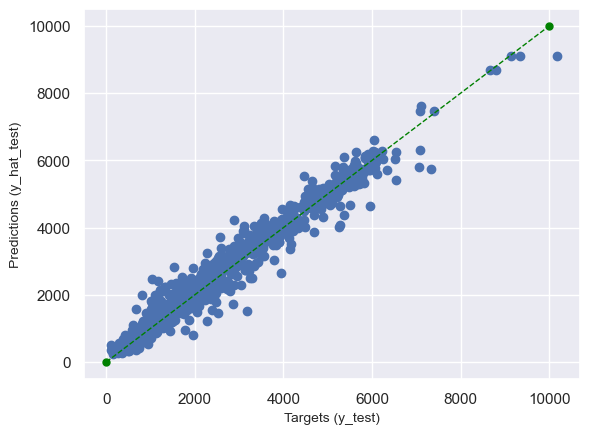

In [15]:
#Plotting test data results

plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=10)
plt.ylabel('Predictions (y_hat_test)',size=10)
plt.plot([0,10000], [0,10000], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
round(r2_score(y_test, y_hat_test), 4)

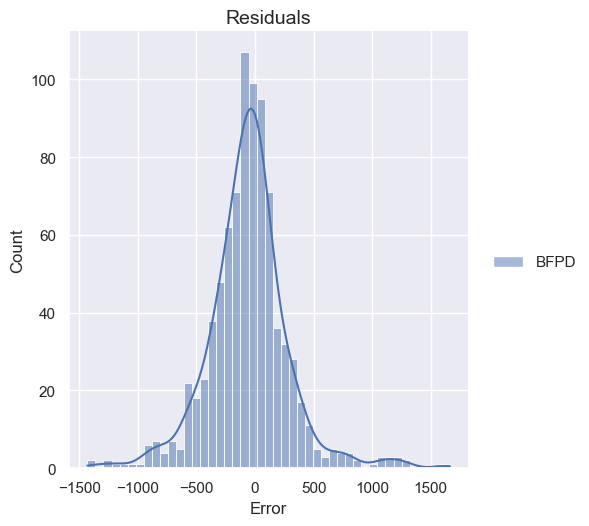

In [16]:
#plotting the error distribution

sb.displot(y_test - y_hat_test, kde=True)
plt.xlabel("Error")
plt.title("Residuals", size=14);

In [17]:
#Printing final results
print("Mean absolute error is " + str(round(mean_absolute_error(y_test, y_hat_test))))
print("Mean square error is " + str(round(np.sqrt(mean_squared_error(y_test, y_hat_test)))))
print("Mean absolute percent error is " + str(round(mean_absolute_percentage_error(y_test, y_hat_test)*100, 1))+"%")
print("R2 score is " + str(round(r2_score(y_test, y_hat_test), 4)))

Mean absolute error is 247
Mean square error is 353
Mean absolute percent error is 14.9%
R2 score is 0.9611


In [18]:
from tensorflow.keras.models import save_model
save_model(model, "ANN_model.h5")

From the above results, Extra Trees regressor is better than artificial neural network for predicting fluid rate, but the model still give comparable results to the remaining machine learning models, as the results are close to the second best model (XGB regressor). 

from tensorflow.keras.models import save_model
save_model(model, "ANN_model.h5")